### install pandas numpy matplotlib

In [27]:

%pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


### Import pandas and read Csv

In [28]:

# TODO: Importera pandas
import pandas as pd

!pwd
%cd "../data"
# TODO: Ladda in data från CSV-fil
df = pd.read_csv('winequality-red.csv')

# TODO: Visa första 5 raderna
df.head()

# TODO: Visa antal rader och kolumner
df.shape

# TODO: Lista alla kolumner
df.columns


/workspaces/Big_data_py/tst/data
/workspaces/Big_data_py/tst/data


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### plot for show data

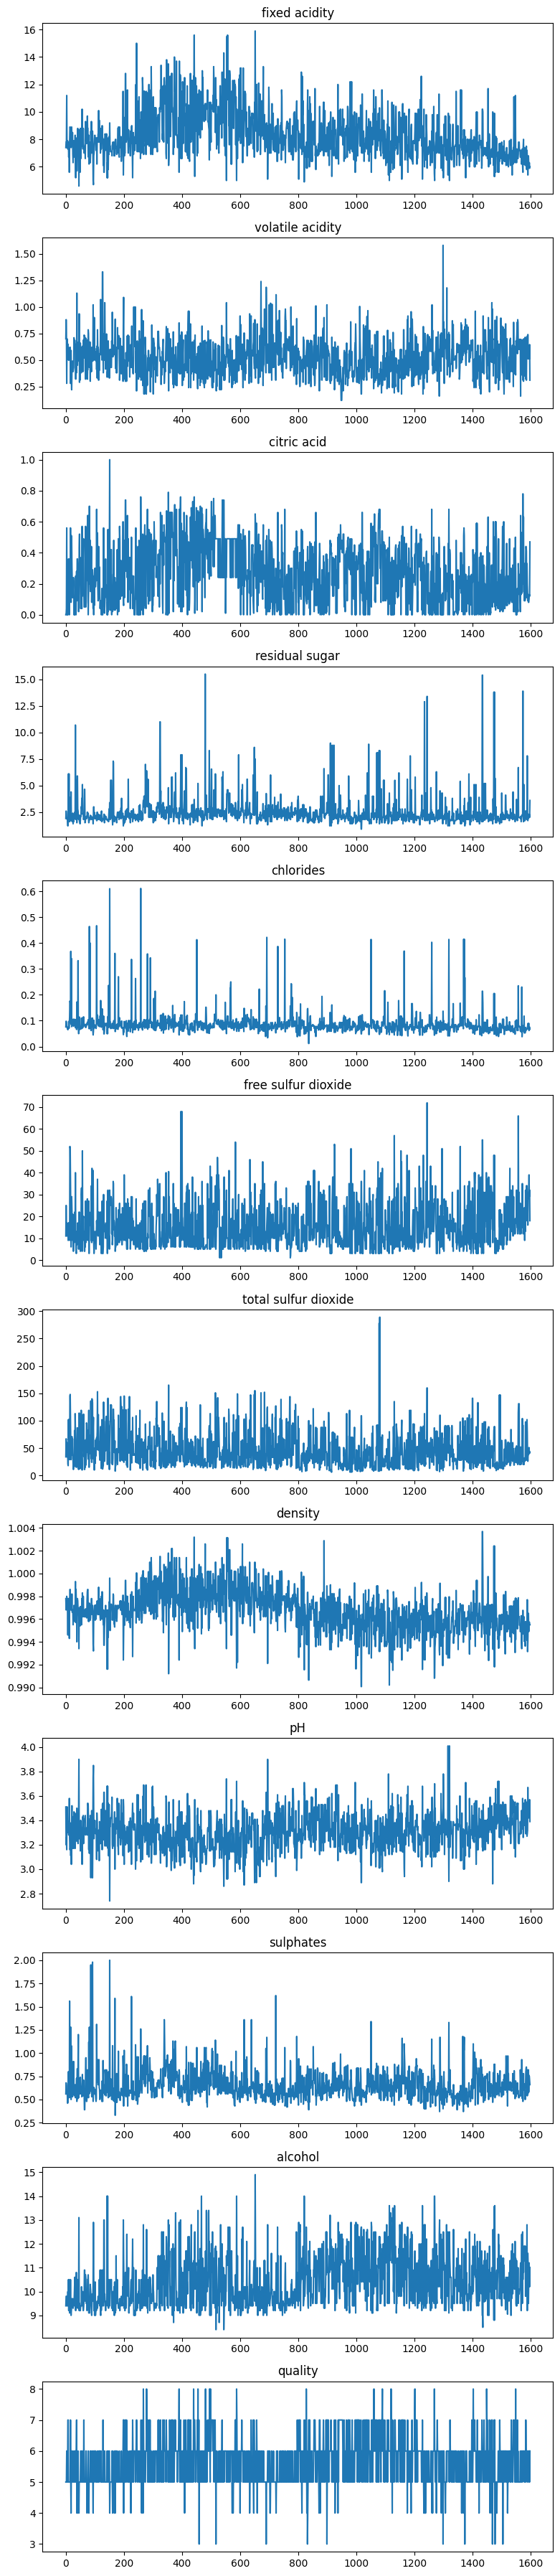

In [29]:
import matplotlib.pyplot as plt

def find_outlier_data(df, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))  # en kolumn av subplots

    for ax, col in zip(axes, columns):
        ax.plot(df[col])
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

find_outlier_data(df, df.columns)


### check nan value


In [30]:
check_nans=df.isna().sum()
print(check_nans)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Outliers


In [43]:

# TODO: Visa statistik för numeriska kolumner
#print(df.describe())

# TODO: Kolla efter outliers (extremvärden)
df_test = (df.loc[:, df.columns != 'quality']).copy()
# print(f"total rows: {len(df)}")

# print(df_test.loc[:, df_test.columns != 'quality'])
for col in df_test.columns:
    Q1 = df_test[f"{col}"].quantile(0.25)
    Q3 = df_test[f"{col}"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #print(f"col: {col} --- IQR: {IQR} --- low: {lower_bound} --- high: {upper_bound}")

    outlier = df_test[(df_test[f"{col}"] > lower_bound) | (df_test[f"{col}"] < upper_bound)]
    # print("Outliers:\n")
print(outlier.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


### Check dublicateds and drop duplicateds


In [32]:
# TODO: Kolla efter duplikate
dups=df.duplicated()
print(dups)

df=df.drop_duplicates()

dropted_dups=df.duplicated()
print(dropted_dups)




0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool
0       False
1       False
2       False
3       False
5       False
        ...  
1593    False
1594    False
1595    False
1597    False
1598    False
Length: 1359, dtype: bool


### Show data with bar chart

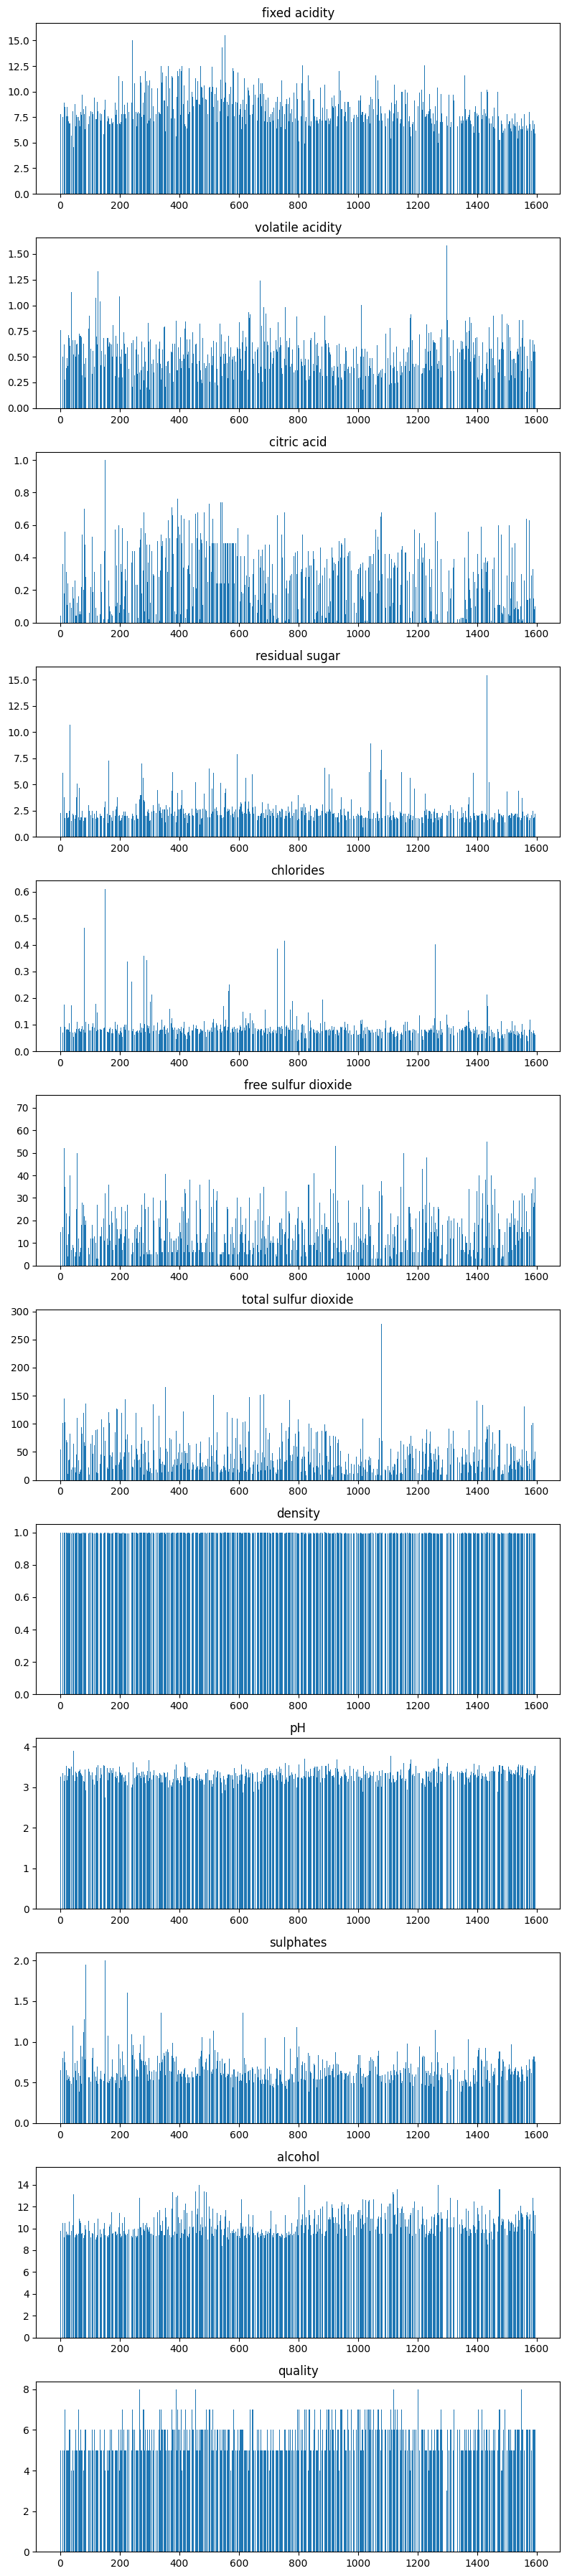

In [33]:
import matplotlib.pyplot as plt

def bar_subplots(dataFrame, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))

    for ax, col in zip(axes, columns):
        ax.bar(dataFrame.index, dataFrame[col])
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

bar_subplots(df, df.columns)


### show data with histogram chart


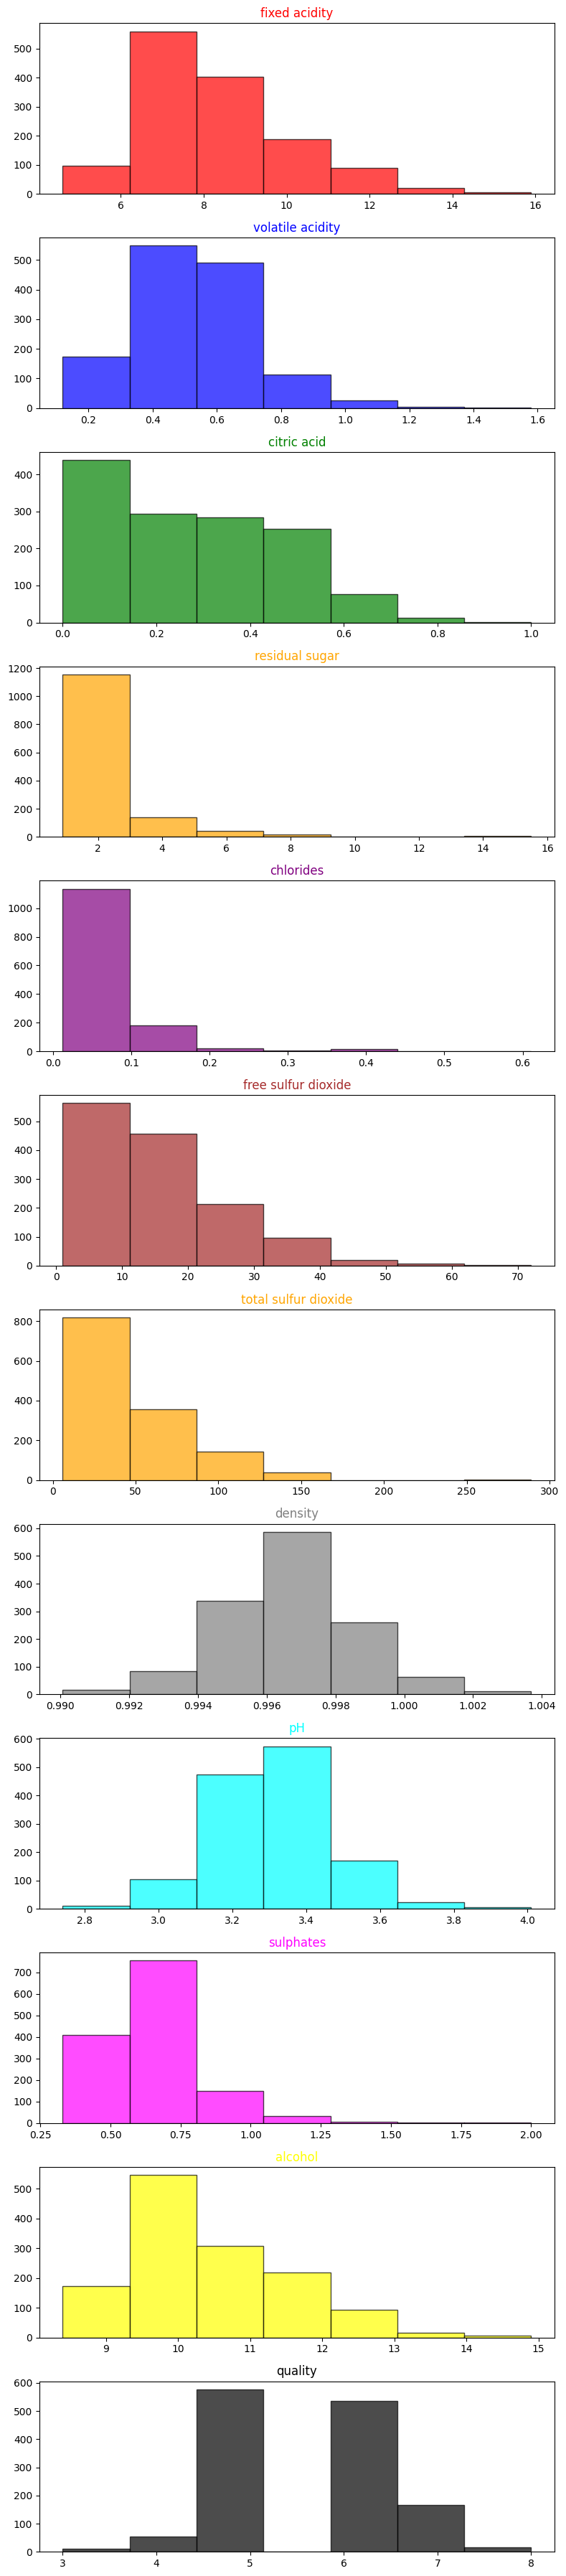

In [34]:
import matplotlib.pyplot as plt

def hist_subplots(df, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))
    colors = ['red','blue','green','orange','purple','brown','orange','gray','cyan','magenta','yellow','black']
    for ax, col,color in zip(axes, columns,colors):
        ax.hist(df[col],bins=7, edgecolor='black', color=color, alpha=0.7)
        ax.set_title(col,color=color)

    plt.tight_layout()
    plt.show()

hist_subplots(df, df.columns)


### Good quality wine data graphs

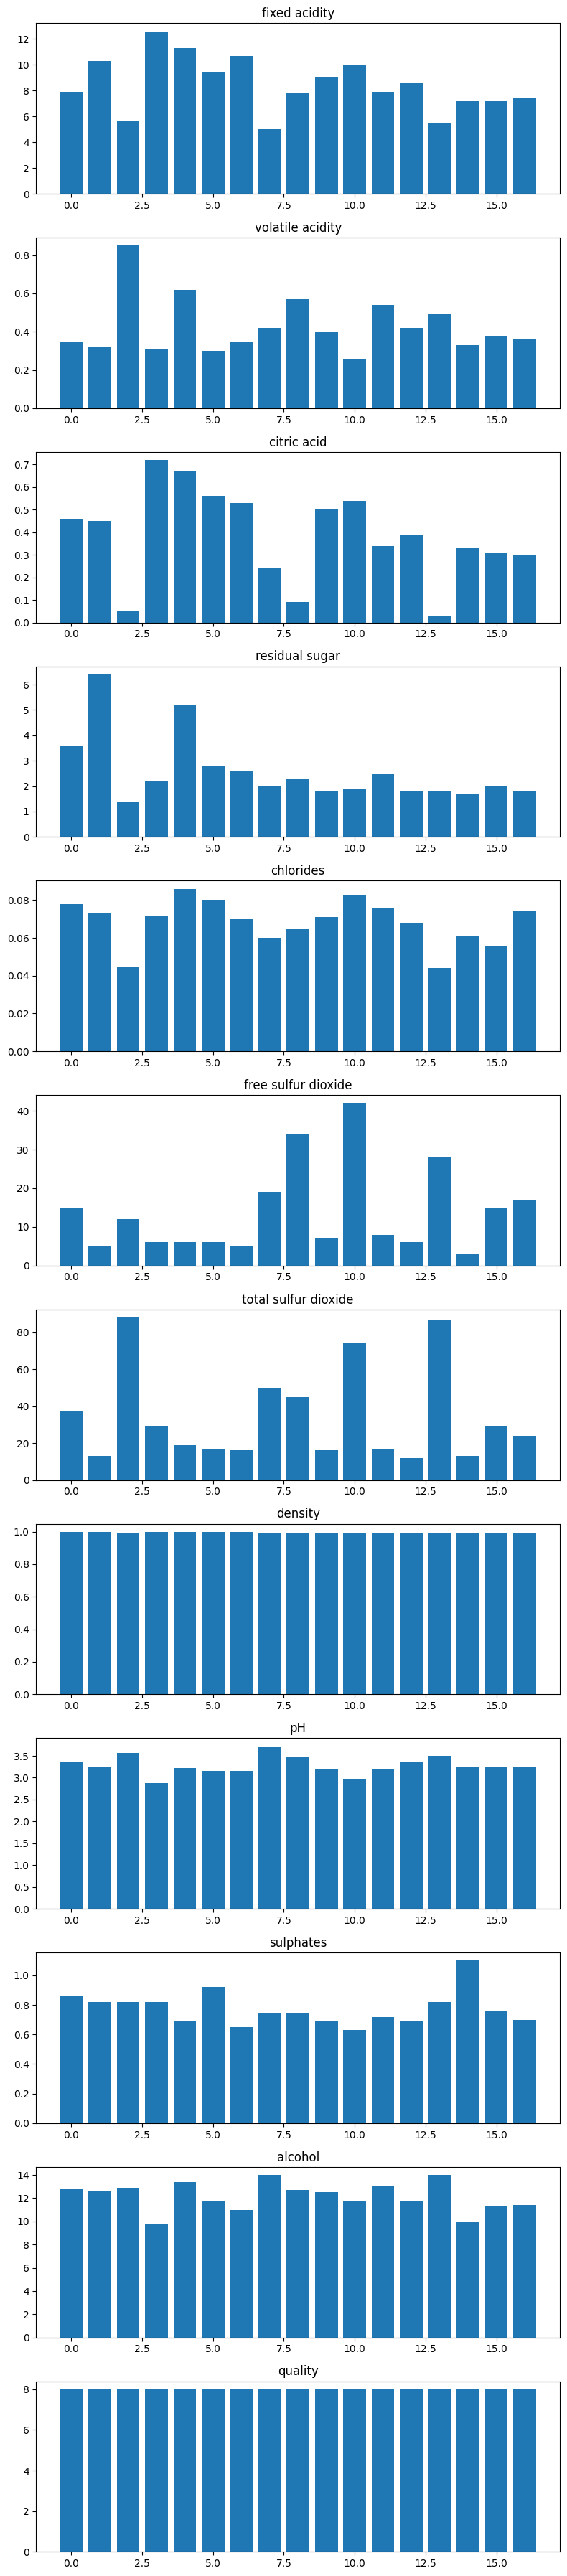

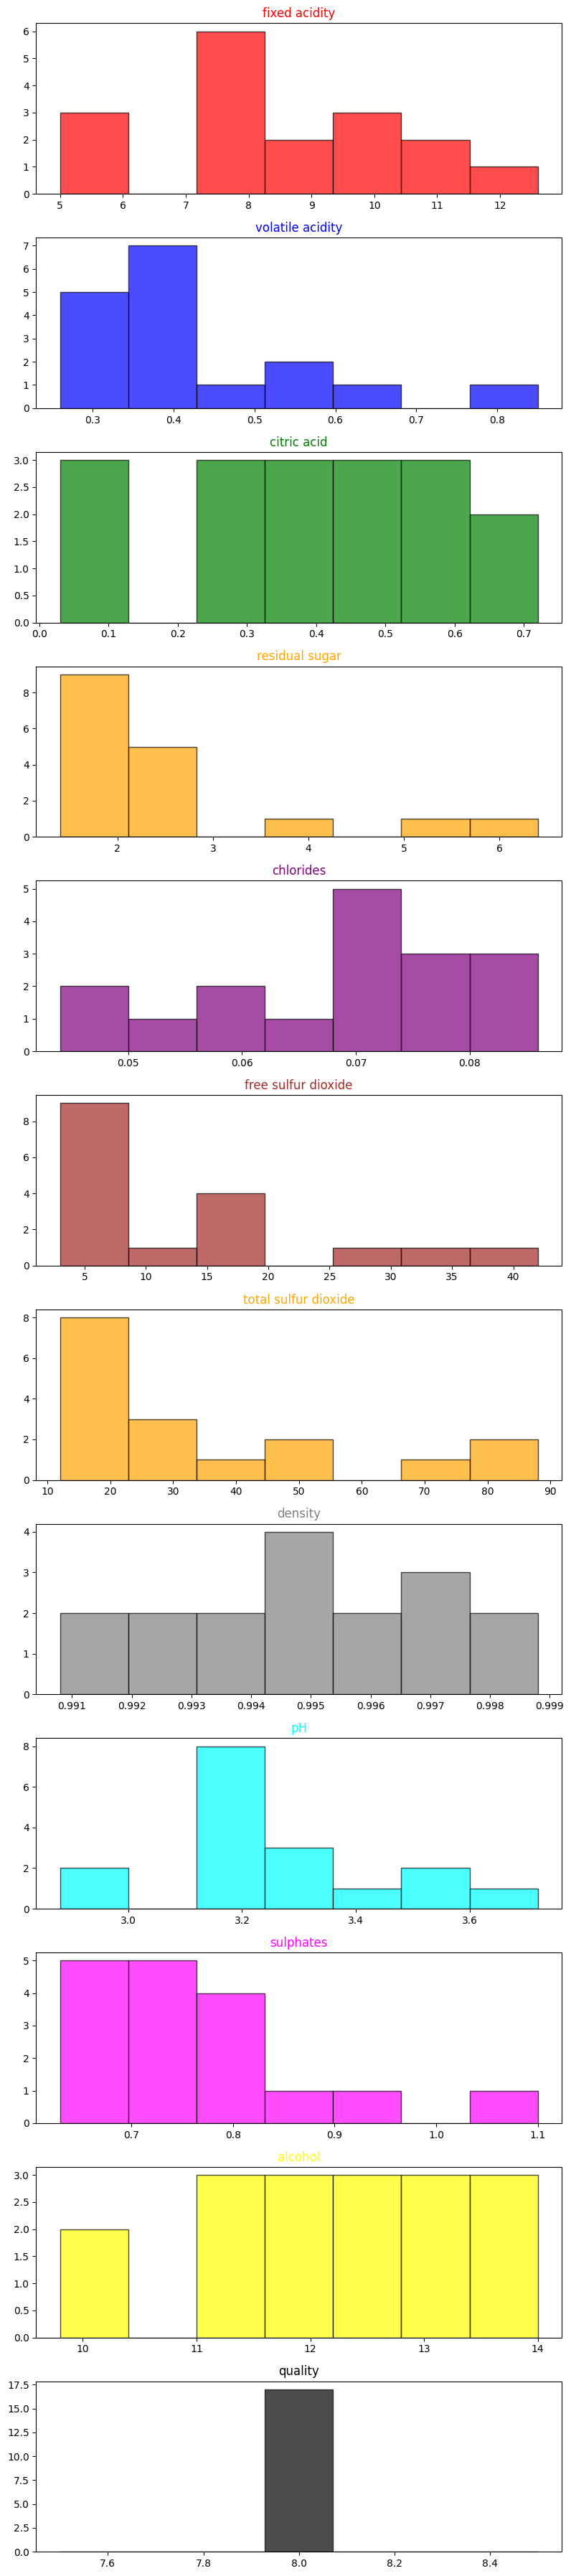

In [35]:
good_quality_wine = df[(df['quality'] >= 7.5)]
good_quality_wine.reset_index(drop=True, inplace=True)

bar_subplots(good_quality_wine, good_quality_wine.columns)
hist_subplots(good_quality_wine, good_quality_wine.columns)
